In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sales_data=pd.read_csv("SalesData.csv")
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


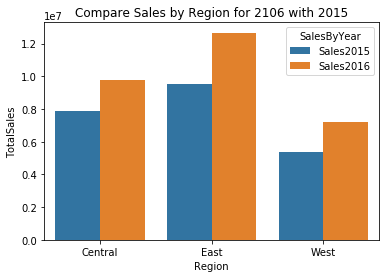

In [3]:
#Solution 1
sales_by_region=sales_data.copy()
agr={"Sales2015":"sum","Sales2016":"sum"}
sales_by_region=sales_by_region.groupby(by=["Region"],as_index=False).agg(agr)
sales_by_region=pd.melt(sales_by_region,id_vars=["Region"],value_name="TotalSales",var_name="SalesByYear")
sns.barplot(x="Region", y="TotalSales", hue="SalesByYear", data=sales_by_region)
plt.title("Compare Sales by Region for 2106 with 2015")
plt.show()




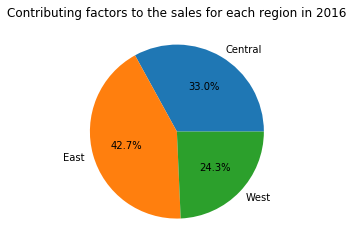

In [9]:
# Solution 2
sales_each_region_2016 = sales_data.copy()
sales_each_region_2016=sales_each_region_2016.groupby(by=["Region"])[["Sales2016"]].sum().add_prefix("Total_")
sales_each_region_2016

plt.pie(sales_each_region_2016.Total_Sales2016,labels=sales_each_region_2016.index,autopct='%1.1f%%')
plt.title("Contributing factors to the sales for each region in 2016")
plt.show()

C:\Users\intel\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


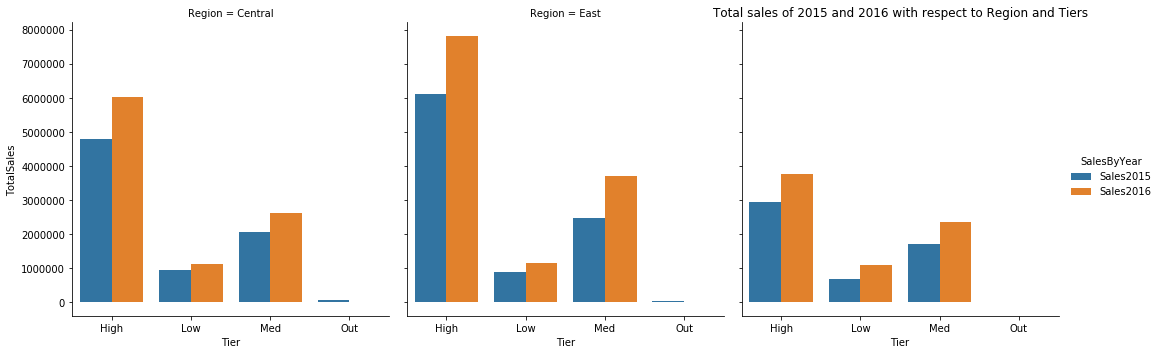

In [17]:
#Solution 3
total_sales_region_tier=sales_data.copy()
agr={"Sales2015":"sum","Sales2016":"sum"}
total_sales_region_tier=total_sales_region_tier.groupby(by=["Region","Tier"],as_index=False).agg(agr)
total_sales_region_tier

total_sales_region_tier=pd.melt(total_sales_region_tier,id_vars=["Region","Tier"],value_name="TotalSales",var_name="SalesByYear")
sns.factorplot(x="Tier", y="TotalSales", hue="SalesByYear",col="Region", data=total_sales_region_tier, kind="bar")
plt.title("Total sales of 2015 and 2016 with respect to Region and Tiers")
plt.show()

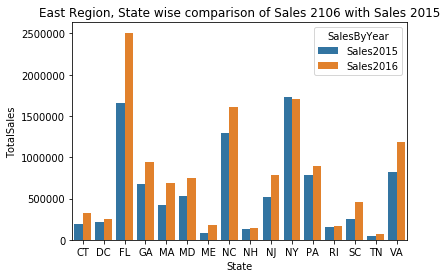

In [22]:
# Solution 4
east_region_sales=sales_data.copy()
agr={"Sales2015":"sum","Sales2016":"sum"}
east_region_sales=east_region_sales.loc[(east_region_sales["Region"]=="East"),].groupby(by=["State"],as_index=False).agg(agr)
east_region_sales

east_region_sales=pd.melt(east_region_sales,id_vars=["State"],value_name="TotalSales",var_name="SalesByYear")
sns.barplot(x="State", y="TotalSales", hue="SalesByYear", data=east_region_sales)
plt.title("East Region, State wise comparison of Sales 2106 with Sales 2015")
plt.show()

#So In East Region, NY registered a decline in Sales 2016 compared to sales 2015 

In [18]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


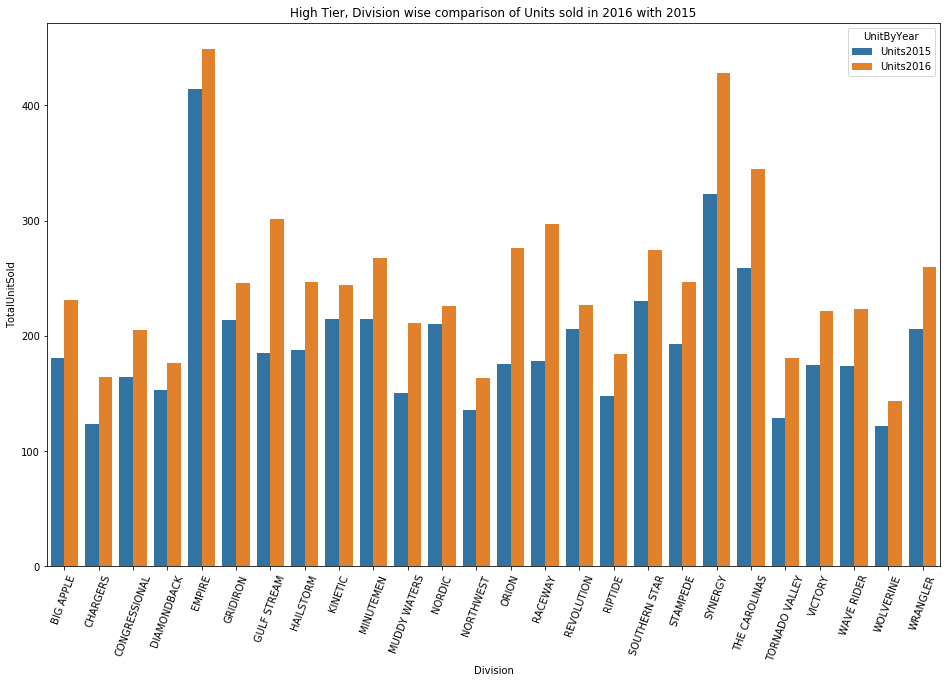

In [28]:
#Solution 5
high_tier_division_unit_sold = sales_data.copy()
agr={"Units2015":"sum","Units2016":"sum"}
high_tier_division_unit_sold=high_tier_division_unit_sold.loc[(high_tier_division_unit_sold["Tier"]=="High"),]
high_tier_division_unit_sold=high_tier_division_unit_sold.groupby(by=["Division"],as_index=False).agg(agr)
high_tier_division_unit_sold

high_tier_division_unit_sold=pd.melt(high_tier_division_unit_sold,id_vars=["Division"],value_name="TotalUnitSold",var_name="UnitByYear")
sns.barplot(x="Division", y="TotalUnitSold", hue="UnitByYear", data=high_tier_division_unit_sold)
plt.title("High Tier, Division wise comparison of Units sold in 2016 with 2015")
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.xticks(rotation=70)
plt.show()

# So in all High Tier, No division registered a decline in number of units sold in 2016 compared to 2015.

In [32]:
# Solution 6
import numpy as np
sales_data["Qtr"]=np.where(((sales_data["Month"]=="Jan")|(sales_data["Month"]=="Feb")|(sales_data["Month"]=="Mar")),"Q1",np.where(((sales_data["Month"]=="Apr")|(sales_data["Month"]=="May")|(sales_data["Month"]=="Jun")),"Q2",np.where(((sales_data["Month"]=="Jul")|(sales_data["Month"]=="Aug")|(sales_data["Month"]=="Sep")),"Q3","Q4")))
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


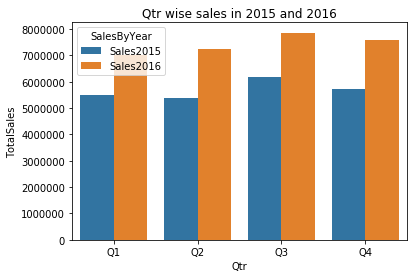

In [34]:
# Solution 7
qtr_wise_sales = sales_data.copy()
agr={"Sales2015":"sum","Sales2016":"sum"}
qtr_wise_sales=qtr_wise_sales.groupby(by=["Qtr"],as_index=False).agg(agr)

qtr_wise_sales=pd.melt(qtr_wise_sales,id_vars=["Qtr"],value_name="TotalSales",var_name="SalesByYear")
sns.barplot(x="Qtr", y="TotalSales", hue="SalesByYear", data=qtr_wise_sales)
plt.title("Qtr wise sales in 2015 and 2016")
plt.show()

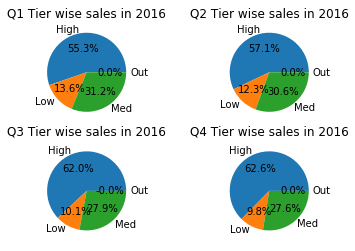

In [49]:
# Solution 8
qtr_tier_sales_2016 = sales_data.copy()
qtr_tier_sales_2016=qtr_tier_sales_2016.groupby(by=["Qtr","Tier"],as_index=False)[["Sales2016"]].sum()

fig, ax = plt.subplots(2,2)

qtr_tier_sales_2016_q1=qtr_tier_sales_2016.loc[(qtr_tier_sales_2016["Qtr"]=="Q1"),["Tier","Sales2016"]]
ax[0,0].pie(qtr_tier_sales_2016_q1.Sales2016,labels=qtr_tier_sales_2016_q1.Tier,autopct='%1.1f%%')
ax[0,0].set_title("Q1 Tier wise sales in 2016")


qtr_tier_sales_2016_q2=qtr_tier_sales_2016.loc[(qtr_tier_sales_2016["Qtr"]=="Q2"),["Tier","Sales2016"]]
ax[0,1].pie(qtr_tier_sales_2016_q2.Sales2016,labels=qtr_tier_sales_2016_q2.Tier,autopct='%1.1f%%')
ax[0,1].set_title("Q2 Tier wise sales in 2016")

qtr_tier_sales_2016_q3=qtr_tier_sales_2016.loc[(qtr_tier_sales_2016["Qtr"]=="Q3"),["Tier","Sales2016"]]
ax[1,0].pie(qtr_tier_sales_2016_q3.Sales2016,labels=qtr_tier_sales_2016_q3.Tier,autopct='%1.1f%%')
ax[1,0].set_title("Q3 Tier wise sales in 2016")

qtr_tier_sales_2016_q4=qtr_tier_sales_2016.loc[(qtr_tier_sales_2016["Qtr"]=="Q4"),["Tier","Sales2016"]]
ax[1,1].pie(qtr_tier_sales_2016_q4.Sales2016,labels=qtr_tier_sales_2016_q4.Tier,autopct='%1.1f%%')
ax[1,1].set_title("Q4 Tier wise sales in 2016")

plt.show() #show all figures


In [29]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
